In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
car = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\car-details-v3.csv")

In [3]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# EDA ON CAR DATA SET

In [6]:
# convert mileage (kmpl) object type to flot type
car['mileage'] = car['mileage'].apply(lambda x: float(x.split()[0]) if type(x)==str else np.nan)
car['mileage'] = car['mileage'].astype("float")

In [7]:
# remove (cc) from engine 
car['engine'] = car['engine'].apply(lambda x: x.replace("CC","") if type(x)==str else np.nan)

In [8]:
# remove bph from max_power convet object type to flot type
car['max_power'] = car['max_power'].apply(lambda x : x.split()[0] if type(x)==str else np.nan )
 

In [9]:
car[['mileage','engine','max_power']]

,mileage,engine,max_power
0,23.40,1248,74
1,21.14,1498,103.52
2,17.70,1497,78
3,23.00,1396,90
4,16.10,1298,88.2
...,...,...,...
8123,18.50,1197,82.85
8124,16.80,1493,110
8125,19.30,1248,73.9
8126,23.57,1396,70


In [10]:
# convert seats flot to categorical
print("Before converting dtype: " + str(car.seats.dtype))
car.seats = car.seats.astype('category')
print("After converting dtype: " + str(car.seats.dtype))


Before converting dtype: float64
After converting dtype: category


In [11]:
car[car["mileage"].isnull() & car["engine"].isnull() & car["seats"].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [12]:
car.dropna(inplace=True)

In [13]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [14]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           7906 non-null   object  
 1   year           7906 non-null   int64   
 2   selling_price  7906 non-null   int64   
 3   km_driven      7906 non-null   int64   
 4   fuel           7906 non-null   object  
 5   seller_type    7906 non-null   object  
 6   transmission   7906 non-null   object  
 7   owner          7906 non-null   object  
 8   mileage        7906 non-null   float64 
 9   engine         7906 non-null   object  
 10  max_power      7906 non-null   object  
 11  torque         7906 non-null   object  
 12  seats          7906 non-null   category
dtypes: category(1), float64(1), int64(3), object(8)
memory usage: 811.0+ KB


In [15]:
car["engine"] = car["engine"].astype(int)
car["max_power"] = car["max_power"].astype(float)

In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           7906 non-null   object  
 1   year           7906 non-null   int64   
 2   selling_price  7906 non-null   int64   
 3   km_driven      7906 non-null   int64   
 4   fuel           7906 non-null   object  
 5   seller_type    7906 non-null   object  
 6   transmission   7906 non-null   object  
 7   owner          7906 non-null   object  
 8   mileage        7906 non-null   float64 
 9   engine         7906 non-null   int32   
 10  max_power      7906 non-null   float64 
 11  torque         7906 non-null   object  
 12  seats          7906 non-null   category
dtypes: category(1), float64(2), int32(1), int64(3), object(6)
memory usage: 780.2+ KB


<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

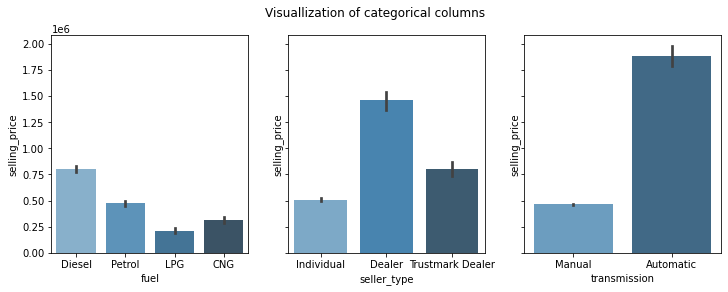

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle('Visuallization of categorical columns')

# Fuel_Type
sns.barplot(x = 'fuel', y = 'selling_price', data = car, ax = axes[0],palette="Blues_d")

# Seller_Type
sns.barplot(x = 'seller_type', y = 'selling_price', data = car, ax = axes[1],palette="Blues_d")

# Transmission
sns.barplot(x = 'transmission', y = 'selling_price', data = car, ax = axes[2],palette="Blues_d")


In [ ]:
car=pd.car(model.features_importance_, index=X.columns)
car.sort_values(ascending=False).plot(king='barh')
plt.show()

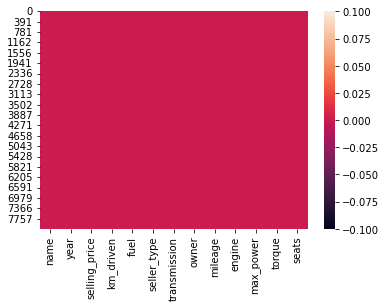

In [20]:
## plot heatmap for car data
sns.heatmap(car.isnull())
plt.show()

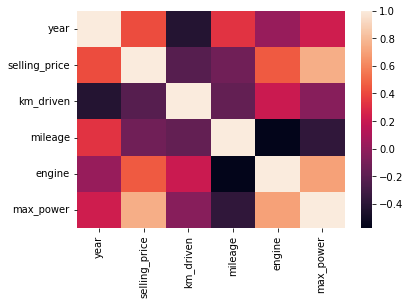

In [21]:
sns.heatmap(car.corr())
plt.show()

In [22]:
car['price_Diff']=car['km_driven']-car['selling_price']

<AxesSubplot:xlabel='seller_type', ylabel='price_Diff'>

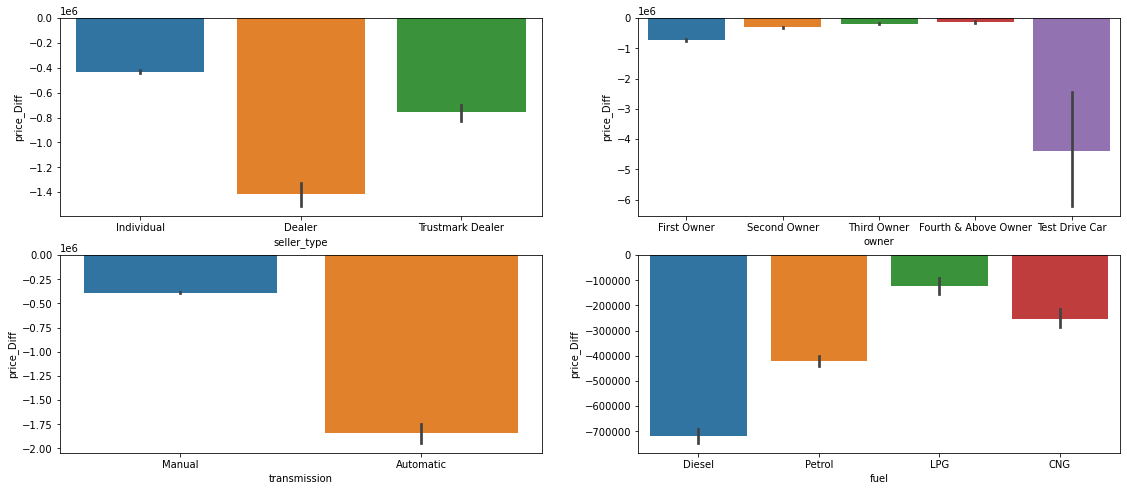

In [23]:
f, axes=plt.subplots(2,2, figsize=(19,8))
sns.barplot(x='transmission',y='price_Diff',data=car,ax=axes[1,0])
sns.barplot(x='fuel',y='price_Diff',data=car,ax=axes[1,1])
sns.barplot(x='owner',y='price_Diff',data=car,ax=axes[0,1])
sns.barplot(x='seller_type',y='price_Diff',data=car,ax=axes[0,0])

In [24]:
car['year']=2011-car['year']

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='selling_price',Data=car)

In [26]:
car['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

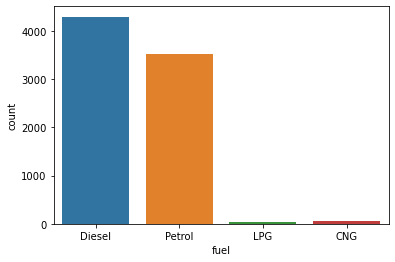

In [27]:
sns.countplot(x='fuel',data=car)
plt.show()


maximum car are using diesel

In [28]:
car['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

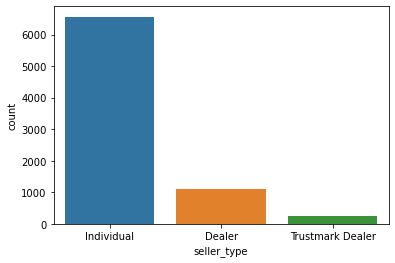

In [29]:
sns.countplot(x='seller_type', data=car)   
plt.show()

there are maximum Individual seller type

In [30]:
car['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

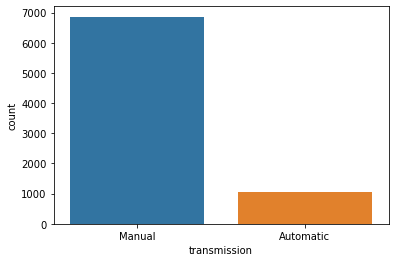

In [31]:
sns.countplot(x='transmission',data=car)
plt.show()

there are more manul transmission type

In [32]:
car['owner'].value_counts()


First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

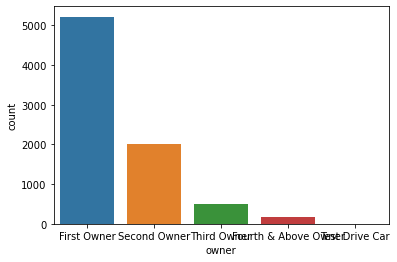

In [33]:
sns.countplot(x='owner',data=car)
plt.show()

most of the owners are "first owners"

In [34]:
car.seats.value_counts()

5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


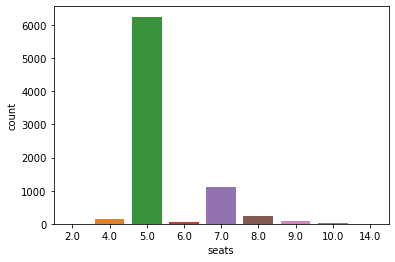

In [35]:
sns.countplot(x='seats',data=car)
plt.show()

most of the customers prefer 5 seater cars

In [36]:
car.drop(['name'],axis=1,inplace=True)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


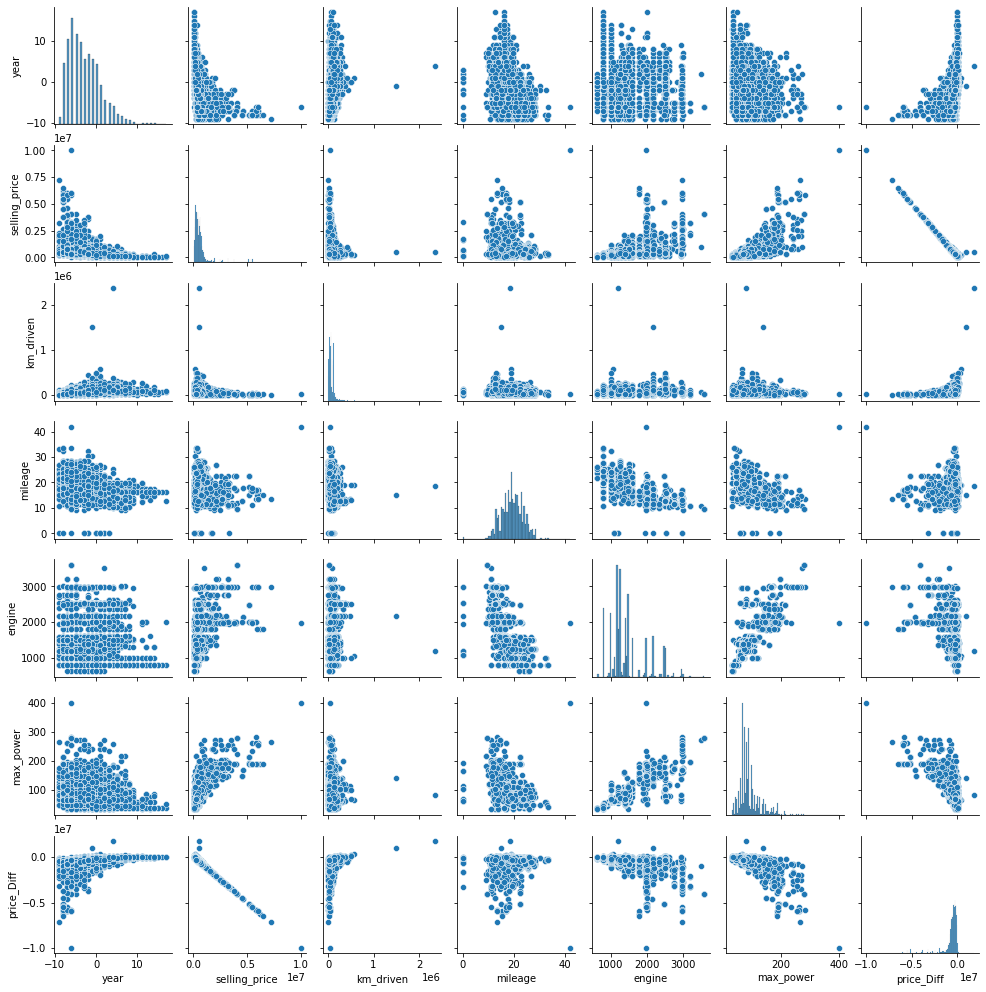

In [37]:
sns.pairplot(car, size = 2)
plt.show()

In [39]:
transmission=pd.get_dummies(car['transmission'],drop_first=True)
transmission

,Manual
0,1
1,1
2,1
3,1
4,1
...,...
8123,1
8124,1
8125,1
8126,1


In [40]:
car.drop(['transmission'],axis=1,inplace=True)

In [41]:
car['transmission'] = transmission

In [42]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,price_Diff,transmission
0,-3,450000,145500,Diesel,Individual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,-304500,1
1,-3,370000,120000,Diesel,Individual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,-250000,1
2,5,158000,140000,Petrol,Individual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,-18000,1
3,1,225000,127000,Diesel,Individual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,-98000,1
4,4,130000,120000,Petrol,Individual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,-10000,1


In [43]:
seller=pd.get_dummies(car['seller_type'],prefix='Seller')
seller

,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
8123,0,1,0
8124,0,1,0
8125,0,1,0
8126,0,1,0


In [44]:
car=pd.concat([car,seller],axis=1)
car.drop(['seller_type'],axis=1,inplace=True)


In [45]:
car.head()

,year,selling_price,km_driven,fuel,owner,mileage,engine,max_power,torque,seats,price_Diff,transmission,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer
0,-3,450000,145500,Diesel,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5.0,-304500,1,0,1,0
1,-3,370000,120000,Diesel,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,-250000,1,0,1,0
2,5,158000,140000,Petrol,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,-18000,1,0,1,0
3,1,225000,127000,Diesel,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,-98000,1,0,1,0
4,4,130000,120000,Petrol,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,-10000,1,0,1,0


In [46]:
car['owner'].replace({"First Owner": 1, "Second Owner" : 2,
                      "Third Owner": 3, "Fourth & Above Owner" : 4,
                      "Test Drive Car" : 5 },inplace=True)

In [47]:
fuel=pd.get_dummies(car['fuel'],prefix='fuel')
fuel

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
8123,0,0,0,1
8124,0,1,0,0
8125,0,1,0,0
8126,0,1,0,0


In [48]:
car.drop(['fuel'],inplace=True,axis=1)
car=pd.concat([car,fuel],axis=1)

In [50]:
car.drop(['torque'],axis=1,inplace=True)

In [51]:
car.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,price_Diff,transmission,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,-3,450000,145500,1,23.40,1248,74.00,5.0,-304500,1,0,1,0,0,1,0,0
1,-3,370000,120000,2,21.14,1498,103.52,5.0,-250000,1,0,1,0,0,1,0,0
2,5,158000,140000,3,17.70,1497,78.00,5.0,-18000,1,0,1,0,0,0,0,1
3,1,225000,127000,1,23.00,1396,90.00,5.0,-98000,1,0,1,0,0,1,0,0
4,4,130000,120000,1,16.10,1298,88.20,5.0,-10000,1,0,1,0,0,0,0,1


# saving to pickel

In [52]:
with open('EDA_CarDekho.pkl', 'wb') as f:
    pickle.dump(car, f)

In [53]:
EDA_File=pickle.load(open('EDA_CarDekho.pkl','rb'))

In [54]:
EDA_File

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,price_Diff,transmission,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,-3,450000,145500,1,23.40,1248,74.00,5.0,-304500,1,0,1,0,0,1,0,0
1,-3,370000,120000,2,21.14,1498,103.52,5.0,-250000,1,0,1,0,0,1,0,0
2,5,158000,140000,3,17.70,1497,78.00,5.0,-18000,1,0,1,0,0,0,0,1
3,1,225000,127000,1,23.00,1396,90.00,5.0,-98000,1,0,1,0,0,1,0,0
4,4,130000,120000,1,16.10,1298,88.20,5.0,-10000,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,-2,320000,110000,1,18.50,1197,82.85,5.0,-210000,1,0,1,0,0,0,0,1
8124,4,135000,119000,4,16.80,1493,110.00,5.0,-16000,1,0,1,0,0,1,0,0
8125,2,382000,120000,1,19.30,1248,73.90,5.0,-262000,1,0,1,0,0,1,0,0
8126,-2,290000,25000,1,23.57,1396,70.00,5.0,-265000,1,0,1,0,0,1,0,0


In [57]:
 x =  EDA_File[['year','km_driven', 'owner', 'mileage', 'engine', 'max_power','seats','price_Diff', 
            'transmission', 'Seller_Dealer', 'Seller_Individual', 'Seller_Trustmark Dealer', 
            'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol']]

In [58]:
y=EDA_File['selling_price']

In [59]:
x

,year,km_driven,owner,mileage,engine,max_power,seats,price_Diff,transmission,Seller_Dealer,Seller_Individual,Seller_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,-3,145500,1,23.40,1248,74.00,5.0,-304500,1,0,1,0,0,1,0,0
1,-3,120000,2,21.14,1498,103.52,5.0,-250000,1,0,1,0,0,1,0,0
2,5,140000,3,17.70,1497,78.00,5.0,-18000,1,0,1,0,0,0,0,1
3,1,127000,1,23.00,1396,90.00,5.0,-98000,1,0,1,0,0,1,0,0
4,4,120000,1,16.10,1298,88.20,5.0,-10000,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,-2,110000,1,18.50,1197,82.85,5.0,-210000,1,0,1,0,0,0,0,1
8124,4,119000,4,16.80,1493,110.00,5.0,-16000,1,0,1,0,0,1,0,0
8125,2,120000,1,19.30,1248,73.90,5.0,-262000,1,0,1,0,0,1,0,0
8126,-2,25000,1,23.57,1396,70.00,5.0,-265000,1,0,1,0,0,1,0,0


In [60]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64